# Disaster Tweets Dataset


Link to Kaggle competition: [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started)

Each sample in the train and test set has the following information:
- The `text` of a tweet

- A `keyword` from that tweet (although this may be blank!)

- The `location` the tweet was sent from (may also be blank)

**Goal**: Predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

**Data (columns)**:
- `id` - a unique identifier for each tweet

- `text` - the text of the tweet

- `location` - the location the tweet was sent from (may be blank)

- `keyword` - a particular keyword from the tweet (may be blank)

- `target` - denotes whether a tweet is about a real disaster (1) or not (0)

## Examples

Examples of some tweets with target value equal to 0:
- `I bought a 64oz jar of peanut butter and it's just getting demolished`

- `tomorrow will be the death of me`

- `@fotofill It looks so desolate. End of the world stuff. Gorgeous.`

Examples of some tweets with target value equal to 1:
- `#Afghanistan: sharp rise in women and children casualties in first half of #2015 http://t.co/LdyWd4ydT9`

- `Storm damage reported in West Tennessee http://t.co/90L2lB5WMr`
- `Adult dies of plague in Colorado http://t.co/yoHVuwuMZS`

Next tweet is interesting because it is labelled as a disaster, but
it's quote from game and location value is `Whiterun, Skyrim`
which is a location of a town in game `Skyrim`. We can conclude
that quality of this dataset is not ideal.
- `Destruction magic's fine just don't go burning down any buildings`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

In [2]:
df = pd.read_csv('../data/tweet_disaster.csv')
print('Dataset size:', df.shape[0])
df.head()

Dataset size: 7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Column `id` can be dropped.

In [3]:
df = df.drop('id', axis=1)
df.head()

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Target

In [4]:
# There is not missing tweet label
df.target.isna().any()

False

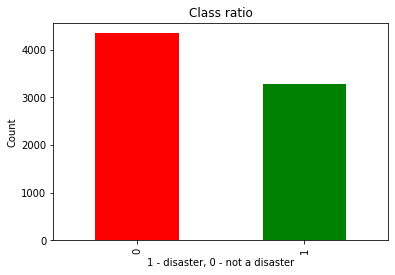

In [5]:
# Dataset has more 0 instances but they are fairly balanced
df.target.value_counts().plot.bar(color=['red', 'green'])
plt.xlabel('1 - disaster, 0 - not a disaster')
plt.ylabel('Count')
plt.title('Class ratio')
plt.show()

## Feature "keyword"

In [6]:
def clean_feature_keyword(df: pd.DataFrame) -> pd.DataFrame:
    # Blank line (nan) means there is not keyword
    df.keyword = df.keyword.fillna('none')
    # Rreplacing space character with '_'
    df.keyword = df.keyword.astype('str').apply(lambda x: x.replace('%20', '_'))
    return df

df = clean_feature_keyword(df)
df.keyword.describe()

count     7613
unique     222
top       none
freq        61
Name: keyword, dtype: object

In [7]:
def show_examples(series: pd.Series, n: int = 10) -> None:
    sample = series.unique()
    random.shuffle(sample)
    for s in sample[:n]:
        print(f'"{s}"')

print('Keyword examples:')
show_examples(df.keyword)

Keyword examples:
"police"
"flames"
"tragedy"
"disaster"
"landslide"
"mass_murder"
"airplane_accident"
"windstorm"
"exploded"
"wrecked"


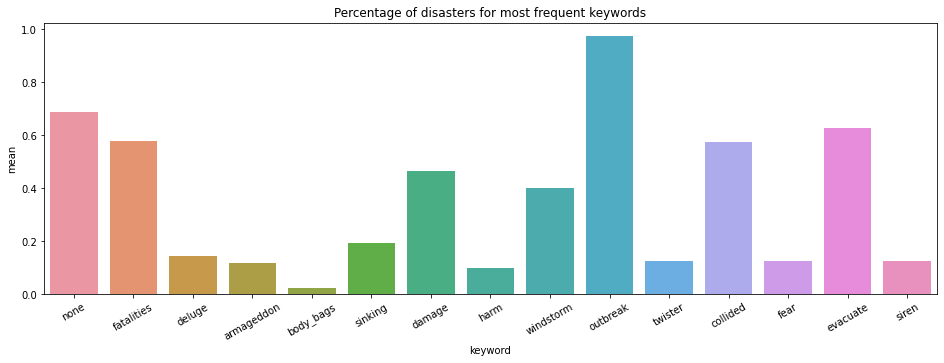

In [8]:
top10 = (df.groupby('keyword')['target']
    .agg(['count', 'mean'])
    .reset_index()
    .sort_values(by='count', ascending=False)
    .head(15))

# Analysis of 10 most frequent words
fig, ax = plt.subplots(figsize=(16, 5))
plt.title('Percentage of disasters for most frequent keywords')
sns.barplot(x='keyword', y='mean', data=top10, ax=ax)
plt.xticks(rotation=30)
plt.show()

## Feature "location"

In [9]:
def clean_feature_location(df: pd.DataFrame) -> pd.DataFrame:
    # Blank line (nan) means that location is unknown
    df.location = df.location.fillna('none')
    return df

df = clean_feature_location(df)
df.location.describe()

count     7613
unique    3342
top       none
freq      2533
Name: location, dtype: object

In [10]:
print('Location examples:')
show_examples(df.location)

Location examples:
"Cape Town, Khayelitsha"
"KADUNA, NIGERIA"
"Hickville, USA"
"Kansas City, Mo."
"11/4/14"
"Starling City"
"Davao City"
"Irving , Texas"
"Raleigh, NC"
"New South Wales, Australia"


Feature `location` has bad quality and won't be analysed further because it requires lot of time which may not be worth it.

## Feature "text"